Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 07 in Python
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_
---    

Input N3:

Output N3:

Input N4:

Output N4:

Input N5:

Output N5:

---

### Exercise 1: Classifying Hand-Written Digits with PyTorch

#### Getting Started

This exercise will give a short introduction into the framework PyTorch (https://pytorch.org/) to build small and large neural networks.

PyTorch is an open-source deep learning framework that’s known for its flexibility and ease-of-use. This is enabled in part by its compatibility with the popular Python high-level programming language favored by machine learning developers and data scientists.

##### What is PyTorch?

PyTorch is a fully featured framework for building deep learning models, which is a type of machine learning that’s commonly used in applications like image recognition and language processing. Written in Python, it’s relatively easy for most machine learning developers to learn and use. PyTorch is distinctive for its excellent support for GPUs and its use of reverse-mode auto-differentiation, which enables computation graphs to be modified on the fly. This makes it a popular choice for fast experimentation and prototyping.

##### Key Benefits of PyTorch

- There’s a large and vibrant community at PyTorch.org community with excellent documentation and tutorials. The forums are active and supportive.
- It’s written in Python and integrated with popular Python libraries like NumPy for scientific computing, SciPy, and Cython for compiling Python to C for better performance. Because its syntax and usage are similar to Python’s, PyTorch is relatively easy for Python developers to learn.
- It supports CPU, GPU, and parallel processing, as well as distributed training. This meana that computational work can be distributed among multiple CPU and GPU cores, and training can be done on multiple GPUs on multiple machines.


__Please install the `torch` and `torchvision` packages, ideally by following the setup guide: (https://pytorch.org/get-started/locally/).__


#### More Information: 
 
You can find many resources on how to get started with PyTorch, both in written form or as videos.
In this exercise, we want to give a brief introduction. You will learn how to:

1. How to create a model. 
2. How to select an optimizer, a loss function and a metric. 
3. How to train the model on data. 
4. How to predict. 

#### Exercise 1:  Build your first small Neural Network 

__In this exercise we will use a Neural Network on a real data set. We will classify the digits dataset (MINST)__

You are allowed to use the following packages only.

In [1]:
import torch
import torchvision

In [2]:
# You can keep the following parameters for training and testing
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.manual_seed(random_seed)

##### __(a) Load the MNIST dataset via the torchvision dataset functionality. Load both the training and test data__
_(Hint: use the `DataLoader` from torch and `datasets.MNIST` class from the torch library, Create a separate dataloader for training and testing.)_

- Use a batch size of 64 for training, and 1000 for testing (You can just the parameters before)
- You can pass a transform the PyTorch dataloaders to perform pre-processing of the data, use `torchvision.transforms.Compose` to chain the processing steps of `torchvision.transforms.ToTensor()`(converting images to PyTorch tensors) and `torchvision.transforms.Normalize((0.1307,), (0.3081,))` (normalize the data with mean and std. of the MNIST dataset)
- Make sure to shuffle the data.

In [3]:
# Code here
def create_loader(train: bool, batch_size: float) -> None:
    loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST(
            "./data",
            train=train,
            download=True,
            transform=torchvision.transforms.Compose([
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.1307,), (0.3081,))
            ])
        ),
        batch_size=batch_size,
        shuffle=True
    )

    return loader

In [4]:
train_loader = create_loader(train=True, batch_size=batch_size_train)
test_loader = create_loader(train=False, batch_size=batch_size_test)

##### __(b) Quickly describe what the MMNIST dataset is. If you like, you can also visualize samples from the dataset.__

The data contains handwritten numbers with labels:

In [5]:
import matplotlib.pyplot as plt

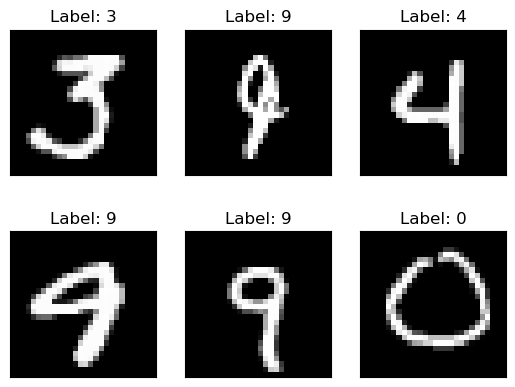

In [6]:
_, (example_features, example_target) = next(enumerate(test_loader))
examples = [{"img": tensor[0], "label": label.item()} for tensor, label in zip(example_features, example_target)]

fig, _ = plt.subplots(nrows=2, ncols=3)

for i, ax in enumerate(fig.axes):
  ax.imshow(examples[i]["img"], cmap="grey")
  ax.set_title(f"Label: {examples[i]['label']!s}")
  ax.set_xticks([])
  ax.set_yticks([])

##### __(c) Create the neural network to train.__

Create a network with the `torch.nn` package. The package contains many different layers with can be composed into complex neural networks.
- Create a class `Net` that inherits from `nn.Module`.
- Specify the layers you want to use in the `__init__(self)` method of the class.
- Define the `forward(self, x)` to define how the output is computed given the input `x` and layers you specified in the init

You have ***two options*** for your network. Choose either one:

1. Use this given architecture: A CNN network architecture containing the following layers:
- A first `Conv2d` layer with kernel size 5, 10 filters, and stride 2
- A `nn.RELU()` activation layer
- A second `Conv2d` layer with kernel size 5 and 20 filters, and stride 2
- A `nn.RELU()`activation layer
- A first fully connected (`linear`) layer with 320 input neurons and 50 output neurons
- A final `nn.RELU()` activation layer
- A second fully connected layer with 50 input neurons and 10 output neurons (corresponding to the number of classes)
- A softmax layer that turns the network activations into class probabilities

2. Choose and implement your own network architecture. You are completely free in choosing a architecture you build from layers of the `nn` package. As the only condition, your network should achieve a test accuracy of at least 85%.

In [7]:
import torch.nn as nn

# Code here
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv1(x), 2))
        x = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.dropout(x, training=self.training)
        x = self.fc2(x)
        return torch.nn.functional.log_softmax(x)

##### __(d) Initialize the network (by calling the empty constructor) and create the optimizer (`optim.SGD`) by passing the network parameters.__

In [8]:
import torch.optim as optim

network = Net()

# Code here: Initialize the optimizer
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

##### __(f) We now train the neural network on the training data set and predict the test data set. For this, we have implemented the train and test functions for you. If you did the previous task correctly, this code should run without errors.__

In this exercise, you task is to understand the given code. Try to ***fill the empty comments marked by `Explanation:`*** in the following code blocks. You can use any online ressources you like as reference:

In [9]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [10]:
import torch.nn.functional as F

def train(epoch): 
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # Explanation: Setting the gradients to zero
        output = network(data)
        loss = F.nll_loss(output, target) # Explanation: Computing negative log likelihood loss
        loss.backward() # Explanation: Collect a set of new gradients...
        optimizer.step() # Explanation: ...and propagate them back
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [11]:
def test():
    network.eval() # Explanation: Set the module to evaluation mode (inherited from nn.Module)
    test_loss = 0
    correct = 0
    with torch.no_grad(): # Explanation: Disable gradient calculation using context manager
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() # Explanation: collect negative log likelihood losses from testing
            pred = output.data.max(1, keepdim=True)[1] # Explanation: Get predictions
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

##### __(g) Run training and testing and describe the output.__

In [12]:
# Your implementation should be compatible with the following code

test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/tmp/ipykernel_9074/1863849584.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.log_softmax(x)
/home/kssrr/.conda/envs/DataMining/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313179
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300776
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298872
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.276723
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241102
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.248662
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.189547
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.146399
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.107701
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.011356
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.843857
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.758839
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.672644
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.687645
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.426628
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.284204
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.318824
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.445287
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.140686
Train Epoch: 1 [12160/6

##### __(g) We have saved traning statistics in the train_losses/test_losses lists. Plot the training and test accuracy values during training. You can use any plotting library, e.g. matplotlib or seaborn.__

Text(0, 0.5, 'Loss')

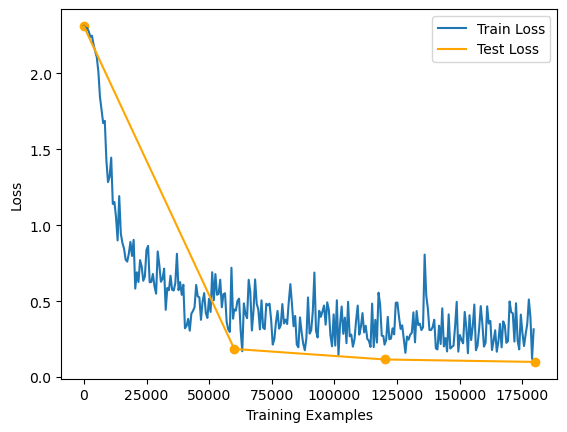

In [13]:
import matplotlib.pyplot as plt

# Code here
plt.plot(train_counter, train_losses)
plt.plot(test_counter, test_losses, color="orange")
plt.scatter(test_counter, test_losses, color="orange")
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('Training Examples')
plt.ylabel('Loss')

***Interpret the results***

Answer here

```
> Your Answer
```

The loss for both training and testing data decreases as the number of "seen" training examples increases.

#### Exercise 2: Use all the transformers

As we learned in the lecture, nowadays, transformers are the way to go.    
Large language models such as GPT2 and GPT3 are currently state-of-the-art for a lot of natural language processing.  
Now, we want to look at how hard or easy it is to work with these models.  
So, we start with a smaller model, the [GPT2 model](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf), and use it for some text generation using the hugging face (https://huggingface.co/) [packaging](https://huggingface.co/docs/transformers/model_doc/gpt2).

__Please install the `transformers` packages, ideally by following the setup guide: (https://huggingface.co/docs/transformers/installation).__


##### __a) Load the `gpt2` (https://huggingface.co/gpt2) model from the `transformers` package and generate some follow up to 'Hi, I am a transformer, I can'.__

In [14]:
# Code here
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")
generator("Hi, I am a transformer, I can", num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hi, I am a transformer, I can't be bothered to talk about it. But I do have some questions. In a particular case, the transformer that I have is very expensive and needs to be replaced, a transformer that is in very good"},
 {'generated_text': "Hi, I am a transformer, I can blow some stuff up without damaging the environment.\n\nI am happy with my choice of material and in other ways. It gives me something to say. The fact is my hair isn't made of rubber"},
 {'generated_text': 'Hi, I am a transformer, I can do anything I want. I am a woman but the only reason I stay in this body is because I love your body and it would be like a dream come true. I want you to go in front'},
 {'generated_text': "Hi, I am a transformer, I can also transform anything and everything, in any way of use. It is, however, up to you to define your use case. Most people won't be able to see what you actually do, but it"},
 {'generated_text': "Hi, I am a transformer, I can't believe your busi

##### __b) Use your previous code and change the `temperature`. Which changes do you see?__
_(Hint: use the `temperature` keyword parameter in the `generator` to achieve this.)_

In [15]:
# Code here
generator("Hi, I am a transformer, I can", num_return_sequences=5, temperature=0.1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hi, I am a transformer, I can't tell you how many times I have to explain to my wife that I am a transformer. I am a transformer, I can't tell you how many times I have to explain to my wife that I"},
 {'generated_text': "Hi, I am a transformer, I can't do anything about it. I am a transformer. I am a transformer. I am a transformer. I am a transformer. I am a transformer. I am a transformer. I am a transformer."},
 {'generated_text': "Hi, I am a transformer, I can't be bothered to do anything. I am a transformer, I can't be bothered to do anything.\n\nI am a transformer, I can't be bothered to do anything.\n\nI am"},
 {'generated_text': "Hi, I am a transformer, I can't do anything about it. I'm not going to do anything about it. I'm not going to do anything about it. I'm not going to do anything about it. I'm not going to"},
 {'generated_text': "Hi, I am a transformer, I can't do anything about it. I am a transformer, I can't do anything about it. I am a transform

```
> Your Answer
```

The generated outputs seem to converge more, including many very similar or identical formulations.